In [4]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
#s
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [6]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [7]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [8]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [9]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(2)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.0,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [10]:
df_ranking.tail(2)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
293,383,TW000005,TAIWAN,"National Taiwan University, College of Management",교환학생,교환대학,6.0,2.0,3.883967,0.333333,0.647328,0.427532,http://oia.yonsei.ac.kr/partner/expReport.asp?...
294,354,ES000017,SPAIN,Universitat Autonoma de Barcelona,교환학생,교환대학,7.0,0.0,4.854875,0.000000,0.693554,0.208066,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [11]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
UNITED KINGDOM         13
AUSTRALIA              13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
AUSTRIA                 6
SWEDEN                  6
HONG KONG               5
ITALY                   5
NEW ZEALAND             5
TAIWAN                  4
FINLAND                 4
RUSSIAN FEDERATION      3
SWITZERLAND             3
SINGAPORE               3
IRELAND                 2
NORWAY                  2
DENMARK                 2
THAILAND                2
POLAND                  1
ISRAEL                  1
TURKEY                  1
CZECH REPUBLIC          1
LITHUANIA               1
BELGIUM                 1
MEXICO                  1
Name: 국가, dtype: int64

In [44]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'TAIWAN')]
print(df_ranking_sw.shape)

(4, 13)


In [45]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [46]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [47]:
df_column = df_specific.fillna("")
df_column.head(0)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info


In [48]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [70]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [71]:
gen_data= 'gen_info'
univ_code = "TW000005"

In [72]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [73]:
str_example = access_univ_info(df_specific, gen_data, univ_code)
str_example[:500] 

'교환대학의 크기는 대만 총 면적의 를 차지할 정도로 정말 컸다 연세대도 큰 캠퍼스로 유명한 학교인데 는 정말 컸다 하지만 연세대와는 다르게 캠퍼스 내부에 언덕이 없고 평지여서 자전거를 타고 이동하면 편리하다 대학 위치 자체는 매우 좋았다 공관역에서 - 분 거리에 위치해있으며 공관역 자체도 도심에서 정거장에서 떨어진 곳이다 기후는 가을학기에 갔음에도 불구하고 개월 넘게 반팔 반바지만 입고 다닐 정도로 더웠다 - 월은 너무 덥고 습해서 외부 활동이 힘들다 월 중순 부터 우기인데 더운데도 비가 오면서 좀 으슬으슬해져서 얇은 외투가 필요하다 가디건이 적당했다 국립대만대학교는 대만에서 가장 좋은 대학교 입니다 대만의 수도 타이베시에 있고 학교의 면적은 대만의 크기를 차지하고 있습니다 학교가 아주 커서 학생들이 항상 자전거를 타고 다닙니다 대만은 섬이라서 한국보다 더 습하고 덥습니다 우산을 자주 가지고 다녀야 합니다 대만은 한국에서 약 시간 반 정도만 가면 되는 가까운 나라입니다 섬나라 이며 '

In [74]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [75]:
# collecting all column values into one string
corpus = str_example
print("글자수:", len(corpus))
corpus[:1000]

글자수: 1580


'교환대학의 크기는 대만 총 면적의 를 차지할 정도로 정말 컸다 연세대도 큰 캠퍼스로 유명한 학교인데 는 정말 컸다 하지만 연세대와는 다르게 캠퍼스 내부에 언덕이 없고 평지여서 자전거를 타고 이동하면 편리하다 대학 위치 자체는 매우 좋았다 공관역에서 - 분 거리에 위치해있으며 공관역 자체도 도심에서 정거장에서 떨어진 곳이다 기후는 가을학기에 갔음에도 불구하고 개월 넘게 반팔 반바지만 입고 다닐 정도로 더웠다 - 월은 너무 덥고 습해서 외부 활동이 힘들다 월 중순 부터 우기인데 더운데도 비가 오면서 좀 으슬으슬해져서 얇은 외투가 필요하다 가디건이 적당했다 국립대만대학교는 대만에서 가장 좋은 대학교 입니다 대만의 수도 타이베시에 있고 학교의 면적은 대만의 크기를 차지하고 있습니다 학교가 아주 커서 학생들이 항상 자전거를 타고 다닙니다 대만은 섬이라서 한국보다 더 습하고 덥습니다 우산을 자주 가지고 다녀야 합니다 대만은 한국에서 약 시간 반 정도만 가면 되는 가까운 나라입니다 섬나라 이며 비가 많이 오고 습한 나라입니다 한국과 비슷한 크기를 가졌으며 타이베이에서 남쪽인 까오슝까지 고속열차를 타면 시간 분이면 도착합니다 국립대만대학교는 대만의 서울대라 불리는 가장 좋은 대학교 입니다 캠퍼스는 아주 크며 평지에 위치하여 학생들은 주로 자전거를 많이 타고 다닙니다 자연과 어우러진 캠퍼스이며 도서관도 큰 편입니다 대만 타이완 은 중국의 푸젠성 앞바다에 위치한 섬나라입니다 지리적으로는 서울과 홍콩의 사이쯤 위치한다고 할 수 있습니다 위아래로 길쭉한 쌀알 모양의 대만의 북쪽에 이 나라의 수도 타이페이시가 위치하고 있습니다 그리고 이 타이페이 시가지의 남쪽 언저리에 가 자리 잡고 있습니다 구글맵을 통해 살펴보면 알 수 있겠지만 의 캠퍼스는 매우 큰 편입니다 우리 연세대학교 혹은 서울대학교와 맞먹을 정도로 넓은 캠퍼스를 갖고 있습니다 하지만 모두 평지에 위치해 있기 때문에 캠퍼스를 돌아다니는 것이 우리학교 정문에서 상대까지 등산하는 것만큼 힘이 드는 일은 아닙니다 다만 여름엔 덥

In [76]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [77]:
tw_example = access_univ_info(df_specific, info_list, univ_code)
tw_example[:1000] 

'교환대학의 크기는 대만 총 면적의 를 차지할 정도로 정말 컸다 연세대도 큰 캠퍼스로 유명한 학교인데 는 정말 컸다 하지만 연세대와는 다르게 캠퍼스 내부에 언덕이 없고 평지여서 자전거를 타고 이동하면 편리하다 대학 위치 자체는 매우 좋았다 공관역에서 - 분 거리에 위치해있으며 공관역 자체도 도심에서 정거장에서 떨어진 곳이다 기후는 가을학기에 갔음에도 불구하고 개월 넘게 반팔 반바지만 입고 다닐 정도로 더웠다 - 월은 너무 덥고 습해서 외부 활동이 힘들다 월 중순 부터 우기인데 더운데도 비가 오면서 좀 으슬으슬해져서 얇은 외투가 필요하다 가디건이 적당했다 국립대만대학교는 대만에서 가장 좋은 대학교 입니다 대만의 수도 타이베시에 있고 학교의 면적은 대만의 크기를 차지하고 있습니다 학교가 아주 커서 학생들이 항상 자전거를 타고 다닙니다 대만은 섬이라서 한국보다 더 습하고 덥습니다 우산을 자주 가지고 다녀야 합니다 대만은 한국에서 약 시간 반 정도만 가면 되는 가까운 나라입니다 섬나라 이며 비가 많이 오고 습한 나라입니다 한국과 비슷한 크기를 가졌으며 타이베이에서 남쪽인 까오슝까지 고속열차를 타면 시간 분이면 도착합니다 국립대만대학교는 대만의 서울대라 불리는 가장 좋은 대학교 입니다 캠퍼스는 아주 크며 평지에 위치하여 학생들은 주로 자전거를 많이 타고 다닙니다 자연과 어우러진 캠퍼스이며 도서관도 큰 편입니다 대만 타이완 은 중국의 푸젠성 앞바다에 위치한 섬나라입니다 지리적으로는 서울과 홍콩의 사이쯤 위치한다고 할 수 있습니다 위아래로 길쭉한 쌀알 모양의 대만의 북쪽에 이 나라의 수도 타이페이시가 위치하고 있습니다 그리고 이 타이페이 시가지의 남쪽 언저리에 가 자리 잡고 있습니다 구글맵을 통해 살펴보면 알 수 있겠지만 의 캠퍼스는 매우 큰 편입니다 우리 연세대학교 혹은 서울대학교와 맞먹을 정도로 넓은 캠퍼스를 갖고 있습니다 하지만 모두 평지에 위치해 있기 때문에 캠퍼스를 돌아다니는 것이 우리학교 정문에서 상대까지 등산하는 것만큼 힘이 드는 일은 아닙니다 다만 여름엔 덥

## Tokenizing with soynlp

In [78]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [79]:
tokened = tokenizer.tokenize(tw_example)
tokened[:30]

['교환대학의',
 '크기는',
 '대만',
 '총',
 '면적의',
 '를',
 '차지할',
 '정도로',
 '정말',
 '컸다',
 '연세대도',
 '큰',
 '캠퍼스로',
 '유명한',
 '학교인데',
 '는',
 '정말',
 '컸다',
 '하지만',
 '연세대와는',
 '다르게',
 '캠퍼스',
 '내부에',
 '언덕이',
 '없고',
 '평지여서',
 '자전거를',
 '타고',
 '이동하면',
 '편리하다']

In [80]:
from collections import Counter

In [81]:
print(len(es_example)) 

14072


In [82]:
tokened_counted = Counter(tokened)
print("no. words:", len(tokened_counted))
com_words = tokened_counted.most_common(10)
com_words

no. words: 1568


[('수', 33),
 ('있습니다', 32),
 ('때문에', 27),
 ('학교', 23),
 ('있는', 22),
 ('것', 16),
 ('많이', 13),
 ('많습니다', 13),
 ('있고', 12),
 ('정말', 11)]

In [83]:
min(tokened_counted, key=tokened_counted.get)

'교환대학의'

In [84]:
### WORD2VEC

In [85]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', 
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', 
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [86]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()

In [87]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()
kr = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_nogada.txt', encoding='utf').read()

stops_ = stops + kr +'대만'

In [88]:
keywords = []
for n in tokened: 
    if n not in stops_: 
        keywords.append(n)

In [89]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(30)
common_key_words

[('자전거를', 9),
 ('-', 9),
 ('대만의', 9),
 ('대만은', 7),
 ('인실', 6),
 ('기숙사에서', 5),
 ('수업이', 5),
 ('가격이', 5),
 ('기숙사는', 5),
 ('유명한', 4),
 ('내부에', 4),
 ('거리에', 4),
 ('한국과', 4),
 ('편입니다', 4),
 ('근처에', 4),
 ('먹거리도', 4),
 ('편리합니다', 4),
 ('주변에서', 4),
 ('교환을', 4),
 ('교환학생들을', 4),
 ('수강신청', 4),
 ('동아리', 4),
 ('비가', 3),
 ('국립대만대학교는', 3),
 ('대만에서', 3),
 ('학교가', 3),
 ('이며', 3),
 ('위치하고', 3),
 ('갖고', 3),
 ('대만대학교는', 3)]

In [90]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        stopwords = set(stops_), 
                        background_color = backgroundcolor, 
                        max_words= 80,
                        max_font_size= 150,
                        width = width, 
                        height = height)

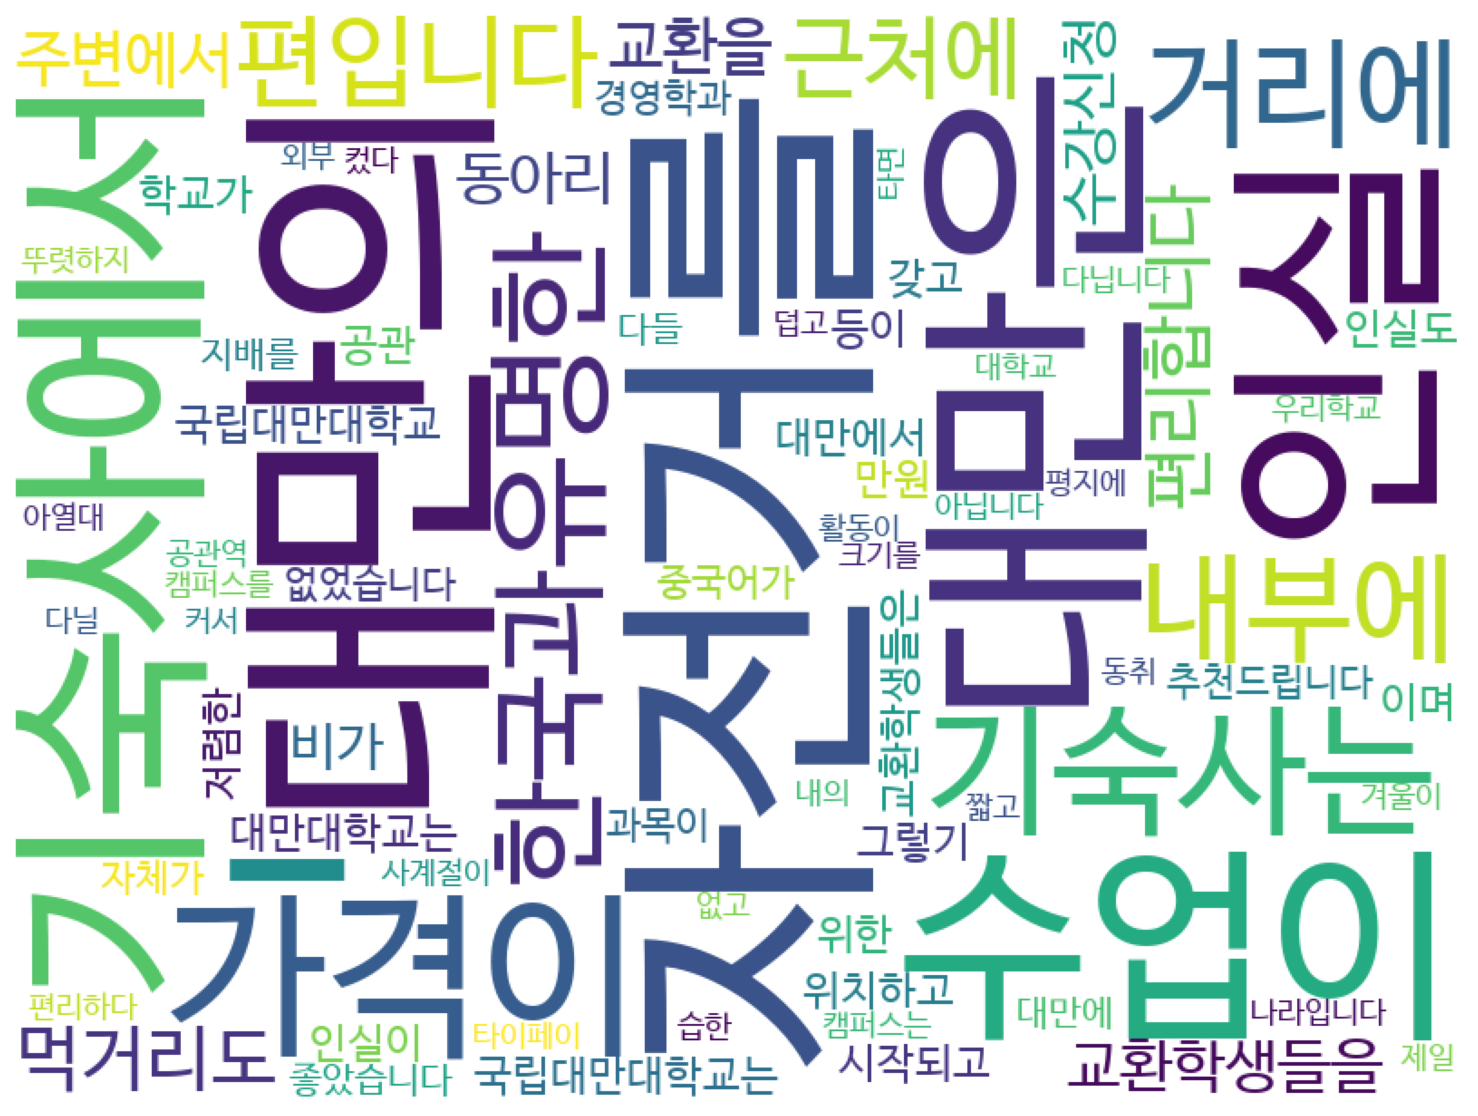

In [95]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [151]:
word_list, frequency_list = map(list, zip(*com_words))
word_list[:10]

['때문에', '수', '있는', '저는', '있습니다', '것', '학교', '같습니다', 'UAB', '기숙사']

In [152]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [153]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (365, 203) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 63 nouns are extracted


In [154]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns

no. gen words: 63


[('바르셀로나',
  NounScore_v1(frequency=37, score=0.9997351250000001, known_r_ratio=1.0)),
 ('시내',
  NounScore_v1(frequency=33, score=0.9995488148148148, known_r_ratio=0.9310344827586207)),
 ('인실',
  NounScore_v1(frequency=22, score=0.5980870833333333, known_r_ratio=1.0)),
 ('학교',
  NounScore_v1(frequency=20, score=0.5168388888888888, known_r_ratio=0.9)),
 ('스페인어',
  NounScore_v1(frequency=18, score=0.9994327777777777, known_r_ratio=1.0)),
 ('신청',
  NounScore_v1(frequency=14, score=0.7739864444444444, known_r_ratio=1.0)),
 ('이용',
  NounScore_v1(frequency=12, score=0.953578, known_r_ratio=0.6666666666666666)),
 ('가격',
  NounScore_v1(frequency=12, score=0.6906819166666667, known_r_ratio=1.0)),
 ('건물',
  NounScore_v1(frequency=11, score=0.5873663333333333, known_r_ratio=0.9)),
 ('거실',
  NounScore_v1(frequency=10, score=0.9171774999999999, known_r_ratio=1.0)),
 ('국제처',
  NounScore_v1(frequency=9, score=0.9996986666666667, known_r_ratio=0.8571428571428571)),
 ('마트',
  NounScore_v1(frequency=9, 

In [155]:
noun_extractor.lrgraph.get_r('날씨')

[('가', 2), ('도', 1), ('를', 1)]

In [164]:
noun_extractor.lrgraph.get_l('가')

[('문제', 5),
 ('들어', 2),
 ('시내', 2),
 ('학교', 2),
 ('기숙사', 2),
 ('날씨', 2),
 ('때', 2),
 ('우리', 2),
 ('동아리', 2),
 ('바르셀로나', 1)]

In [166]:
print((nouns['문제']))

NounScore_v1(frequency=9, score=0.8114515555555556, known_r_ratio=1.0)


In [167]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 2475 from 3288 sents. mem=0.247 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3288, mem=0.251 Gb
[Noun Extractor] batch prediction was completed for 1058 words
[Noun Extractor] checked compounds. discovered 18 compounds
[Noun Extractor] postprocessing detaching_features : 352 -> 348
[Noun Extractor] postprocessing ignore_features : 348 -> 337
[Noun Extractor] postprocessing ignore_NJ : 337 -> 337
[Noun Extractor] 337 nouns (18 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.232 Gb                    
[Noun Extractor] 45.32 % eojeols are covered


In [168]:
nouns_counted_ = Counter(nouns_eo)
print("no. gen words:", len(nouns_counted_))
common_nouns_ = nouns_counted_.most_common(100)
common_nouns_

no. gen words: 337


[('스페인', NounScore(frequency=39, score=1.0)),
 ('시내', NounScore(frequency=34, score=1.0)),
 ('바르셀로나', NounScore(frequency=30, score=1.0)),
 ('수업', NounScore(frequency=27, score=1.0)),
 ('인실', NounScore(frequency=22, score=1.0)),
 ('역', NounScore(frequency=21, score=1.0)),
 ('스페인어', NounScore(frequency=18, score=1.0)),
 ('신청', NounScore(frequency=18, score=1.0)),
 ('이용', NounScore(frequency=17, score=1.0)),
 ('편', NounScore(frequency=16, score=1.0)),
 ('학교', NounScore(frequency=16, score=0.8571428571428571)),
 ('기숙사', NounScore(frequency=14, score=0.8666666666666667)),
 ('방', NounScore(frequency=13, score=1.0)),
 ('가격', NounScore(frequency=12, score=1.0)),
 ('말', NounScore(frequency=11, score=1.0)),
 ('동아리', NounScore(frequency=10, score=1.0)),
 ('건물', NounScore(frequency=10, score=1.0)),
 ('생각', NounScore(frequency=10, score=1.0)),
 ('마트', NounScore(frequency=10, score=1.0)),
 ('사용', NounScore(frequency=10, score=1.0)),
 ('거실', NounScore(frequency=10, score=1.0)),
 ('집', NounScore(freq

In [169]:
list(noun_extractor._compounds_components.items())[:50]

[('바르셀로나자치대학', ('바르셀로나', '자치대학')),
 ('시험기간', ('시험', '기간')),
 ('학교자체', ('학교', '자체')),
 ('연세대학교', ('연세대', '학교')),
 ('크기때문', ('크기', '때문')),
 ('대학생활', ('대학', '생활')),
 ('도시생활', ('도시', '생활')),
 ('출석체크', ('출석', '체크')),
 ('우리학교', ('우리', '학교')),
 ('학교생활', ('학교', '생활')),
 ('실내수영장', ('실내', '수영장')),
 ('소요시간', ('소요', '시간')),
 ('비치되어', ('비치', '되어')),
 ('교내식당', ('교내', '식당')),
 ('점심시간', ('점심', '시간')),
 ('노출되어', ('노출', '되어')),
 ('배정되어', ('배정', '되어')),
 ('하나하나', ('하나', '하나'))]